In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
A = np.array([
    [1,1,0],
    [1,1,1],
    [0,1,1]])

A_sym = sp.Matrix(A)

# Polynomio caracteristico
# Auto valores e auto vetores



lambda**3 - 3*lambda**2 + lambda + 1


In [40]:
## Criar Polinomio em numpy:


In [ ]:
# Auto valores em Numpy

🎨 Visualizando Transformação Linear 2D
Matriz A:
[[2 1]
 [0 1]]
Autovalores: [2. 1.]
Autovetores:
[[ 1.         -0.70710678]
 [ 0.          0.70710678]]


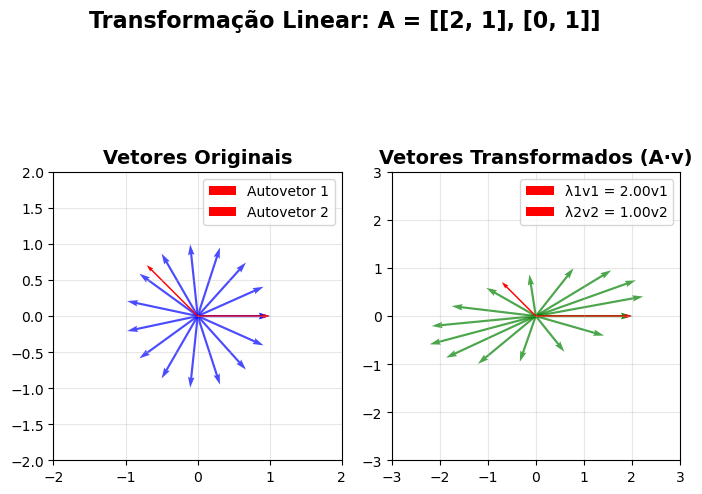

In [36]:
"""
Visualiza como uma matriz 2x2 transforma vetores
"""

print("🎨 Visualizando Transformação Linear 2D")
print("=" * 40)

A = np.array([[2, 1]
            , [0, 1]])
# Calcular autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

print(f"Matriz A:")
print(A)
print(f"Autovalores: {autovalores}")
print(f"Autovetores:\n{autovetores}")

# Criar grade de vetores
theta = np.linspace(0, 2*np.pi, 16)
vetores_originais = np.array([np.cos(theta), np.sin(theta)])

# Aplicar transformação
vetores_transformados = A @ vetores_originais

# Criar figura
fig, axes = plt.subplots(1, 2, figsize=(7,6))

# Plot 1: Vetores originais
ax1 = axes[0]
ax1.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_originais[0], vetores_originais[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='blue')

# Adicionar autovetores originais
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'Autovetor {i+1}')

ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.set_title('Vetores Originais', fontsize=14, fontweight='bold')
ax1.legend()

# Plot 2: Vetores transformados
ax2 = axes[1]
ax2.quiver(np.zeros(len(theta)), np.zeros(len(theta)), 
            vetores_transformados[0], vetores_transformados[1],
            angles='xy', scale_units='xy', scale=1, alpha=0.7, color='green')

# Adicionar autovetores transformados (escalados pelos autovalores)
for i, (lam, v) in enumerate(zip(autovalores, autovetores.T)):
    if np.isreal(lam):
        v_transformado = lam * v
        ax2.quiver(0, 0, v_transformado[0], v_transformado[1], 
                    angles='xy', scale_units='xy', scale=1,
                    color='red', width=0.005, label=f'λ{i+1}v{i+1} = {lam:.2f}v{i+1}')

# Determinar limites baseados na transformação
max_val = max(np.max(np.abs(vetores_transformados)), 3)
ax2.set_xlim(-max_val, max_val)
ax2.set_ylim(-max_val, max_val)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.set_title('Vetores Transformados (A·v)', fontsize=14, fontweight='bold')
ax2.legend()

plt.suptitle(f'Transformação Linear: A = {A.tolist()}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [21]:
"""
Aplicação: Algoritmo PageRank (Google)
"""
# Matriz de adjacência (quem aponta para quem)
# Páginas: A, B, C, D, E
paginas = ['A', 'B', 'C', 'D', 'E']
n_paginas = len(paginas)

# Links: A->B,C; B->C; C->A,B; D->B,C,E; E->A,D
adjacencia = np.array([
    [0, 1, 1, 0, 0],  # A aponta para B, C
    [0, 0, 1, 0, 0],  # B aponta para C
    [1, 1, 0, 0, 0],  # C aponta para A, B
    [0, 1, 1, 0, 1],  # D aponta para B, C, E
    [1, 0, 0, 1, 0]   # E aponta para A, D
])


print("Matriz de adjacência:")
print("   ", " ".join(paginas))
for i, pagina in enumerate(paginas):
    print(f"{pagina}: {adjacencia[i]}")

Matriz de adjacência:
    A B C D E
A: [0 1 1 0 0]
B: [0 0 1 0 0]
C: [1 1 0 0 0]
D: [0 1 1 0 1]
E: [1 0 0 1 0]


Text(0.5, 1.0, 'Rede de Páginas Web')

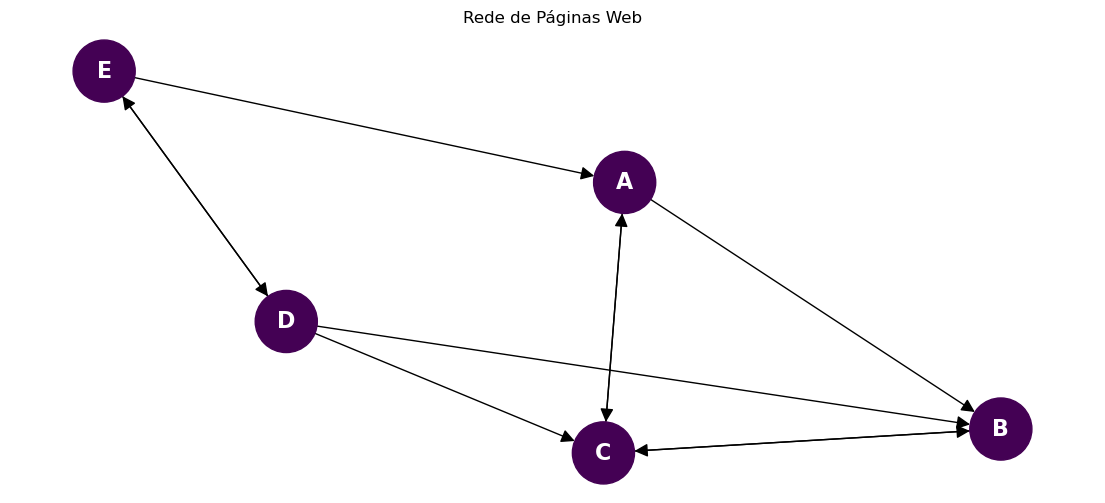

In [19]:
# Visualizar rede e resultados
fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))

# Plot 1: Rede de páginas
G_nx = nx.DiGraph()

# Adicionar nós e arestas
for i, pagina in enumerate(paginas):
    G_nx.add_node(pagina)

for i in range(n_paginas):
    for j in range(n_paginas):
        if adjacencia[i, j] > 0:
            G_nx.add_edge(paginas[i], paginas[j])

# Layout e desenho
pos = nx.spring_layout(G_nx, seed=42)

# Tamanho dos nós proporcional ao PageRank
node_sizes = [2000 for i in range(adjacencia.shape[0])]
node_colors = [0.5 for i in range(adjacencia.shape[0])]

nx.draw(G_nx, pos, ax=ax1, with_labels=True, node_size=node_sizes,
        node_color=node_colors,  arrows=True, 
        arrowsize=20, font_size=16, font_weight='bold',font_color='w')
ax1.set_title('Rede de Páginas Web')


In [22]:
# Construir matriz de transição (Google Matrix)
# Normalizar por linha (probabilidade de seguir cada link)
soma_links = np.sum(adjacencia, axis=1)

# Tratar páginas sem links de saída (dangling nodes)
for i in range(n_paginas):
    if soma_links[i] == 0:
        adjacencia[i] = 1  # Aponta para todas as páginas igualmente
        soma_links[i] = n_paginas

# Matriz de transição estocástica
M = adjacencia / soma_links[:, np.newaxis]

print(f"\nMatriz de transição M:")
print(M)


Matriz de transição M:
[[0.         0.5        0.5        0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.33333333 0.33333333 0.         0.33333333]
 [0.5        0.         0.         0.5        0.        ]]


In [26]:
# Adicionar fator de amortecimento (damping factor)
d = 0.85  # Probabilidade de seguir um link
# (1-d)/n: Probabilidade de pular para qualquer página aleatoriamente



G = d * M + (1 - d) / n_paginas * np.ones((n_paginas, n_paginas))

print(f"\nGoogle Matrix G (com damping factor d={d}):")
print(G)

print(G.sum(axis=1))


Google Matrix G (com damping factor d=0.85):
[[0.03       0.455      0.455      0.03       0.03      ]
 [0.03       0.03       0.88       0.03       0.03      ]
 [0.455      0.455      0.03       0.03       0.03      ]
 [0.03       0.31333333 0.31333333 0.03       0.31333333]
 [0.455      0.03       0.03       0.455      0.03      ]]
[1. 1. 1. 1. 1.]


In [27]:




# PageRank é o autovetor correspondente ao autovalor 1
autovalores, autovetores = np.linalg.eig(G.T)  # Transposta porque queremos autovetor à direita

# Encontrar autovalor mais próximo de 1
idx_pagerank = np.argmin(np.abs(autovalores - 1))
pagerank_vector = np.real(autovetores[:, idx_pagerank])

# Normalizar para que a soma seja 1
pagerank_vector = np.abs(pagerank_vector)  # Garantir valores positivos
pagerank_vector = pagerank_vector / np.sum(pagerank_vector)

print(f"\n🎯 Resultados PageRank:")
print(f"Autovalor dominante: {autovalores[idx_pagerank]:.6f}")

# Ordenar páginas por PageRank
ranking = sorted(zip(paginas, pagerank_vector), key=lambda x: x[1], reverse=True)

print(f"\nRanking das páginas:")
for i, (pagina, score) in enumerate(ranking):
    print(f"{i+1}. Página {pagina}: {score:.4f} ({score*100:.2f}%)")



🎯 Resultados PageRank:
Autovalor dominante: 1.000000+0.000000j

Ranking das páginas:
1. Página C: 0.3913 (39.13%)
2. Página B: 0.3014 (30.14%)
3. Página A: 0.2149 (21.49%)
4. Página D: 0.0486 (4.86%)
5. Página E: 0.0438 (4.38%)


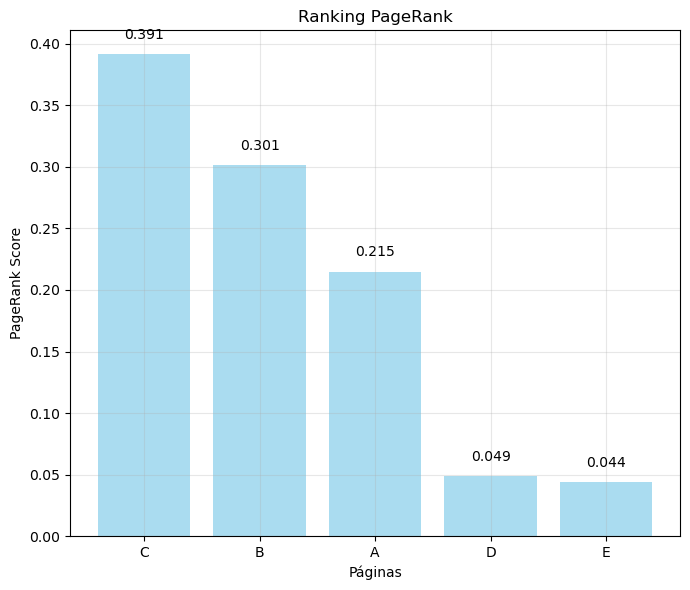

In [ ]:

# Visualizar rede e resultados
# Plot 2: Scores PageRank
fig, ax2 = plt.subplots(1, 1, figsize=(7, 6))

paginas_ordenadas = [pagina for pagina, _ in ranking]
scores_ordenados = [score for _, score in ranking]

bars = ax2.bar(paginas_ordenadas, scores_ordenados, color='skyblue', alpha=0.7)
ax2.set_xlabel('Páginas')
ax2.set_ylabel('PageRank Score')
ax2.set_title('Ranking PageRank')
ax2.grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, score in zip(bars, scores_ordenados):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()